#### Aplicación de índices espaciales a datos geoespaciales locales
* Objeto base: unión entre barrios y radios censales (shapefile). Datos oficiales actuales.
* Atributos relevantes: radios etiquetados con cantidad de población y viviendas.
* Herramientas: ```jupyter notebook```, ```python```, ```pandas```, ```geopandas```, ```import matplotlib.pyplot```, ```folium```, ```h3```.

Algunas funciones de h3 están desactualizadas (ver versión 4).

#### Indexación espacial con H3 (Hierarchical Hexagonal Geospatial Indexing System)
Proceso de carga de datos, transformación a H3 y devolución en geodataframe. Importante: Los geodataframes deben estar en WGS4 (EPSG:4326), de lo contrario va a haber errores en las funciones.

In [52]:
# cargar las librerías

import matplotlib.pyplot as plt
import h3
import pandas as pd 
import geopandas as gpd
import folium
import branca.colormap as cm
from shapely.geometry import Point
import shapely

In [62]:
# cargar los geodataframe desde su directorio

union = gpd.read_file(r"C:\Users\UserMCR\Desktop\Agustín\censo2022\Proyecto\GeoPandasOptimizado\4326\union_prueba.shp")

In [63]:
union.head(1)

,area,perimetro,provincia,dpto,frac,radio,tipo,link,pob2022,viv2022,nombre,nombre_2,zona,geometry
0,1983406.875,9684.93,26,021,07,01,U,260210701,329.0,123.0,None,Astra,Norte,"POLYGON ((-67.50260 -45.73632, -67.50264 -45.7..."


In [64]:
# seleccionar el geodataframe

gdf = union.geometry[0]
type(gdf)

shapely.geometry.polygon.Polygon

In [65]:
# activar la función de la librería de shapely

shapely.geometry.multipolygon.MultiPolygon

shapely.geometry.multipolygon.MultiPolygon

In [66]:
# pedir a (h3) los códigos de celda (valores que representan el centroide de cada celda)
# para cada polígono del geodataframe

h3.geo_to_cells(gdf, res = 10)

['8acf9e00dd4ffff',
 '8acf9e00d8b7fff',
 '8acf9e00caeffff',
 '8acf9e00c217fff',
 '8acf9e00dda7fff',
 '8acf9e00dcf7fff',
 '8acf9e00ca97fff',
 '8acf9e00c26ffff',
 '8acf9e00cb9ffff',
 '8acf9e00dc9ffff',
 '8acf9e00dc47fff',
 '8acf9e00d527fff',
 '8acf9e00c05ffff',
 '8acf9e00db97fff',
 '8acf9e00d107fff',
 '8acf9e00c31ffff',
 '8acf9e00da37fff',
 '8acf9e00c237fff',
 '8acf9e00d8d7fff',
 '8acf9e00c377fff',
 '8acf9e00dd6ffff',
 '8acf9e00cab7fff',
 '8acf9e00ca5ffff',
 '8acf9e0764dffff',
 '8acf9e00dc67fff',
 '8acf9e00dc0ffff',
 '8acf9e00dbb7fff',
 '8acf9e00db1ffff',
 '8acf9e00db5ffff',
 '8acf9e00db07fff',
 '8acf9e00c35ffff',
 '8acf9e00db77fff',
 '8acf9e00d127fff',
 '8acf9e00c307fff',
 '8acf9e00d567fff',
 '8acf9e00d50ffff',
 '8acf9e00c257fff',
 '8acf9e00d8f7fff',
 '8acf9e00dd8ffff',
 '8acf9e00dc27fff',
 '8acf9e00cad7fff',
 '8acf9e00d89ffff',
 '8acf9e00c14ffff',
 '8acf9e00ca1ffff',
 '8acf9e00dcdffff',
 '8acf9e00dc87fff',
 '8acf9e00dc2ffff',
 '8acf9e00dcd7fff',
 '8acf9e00c047fff',
 '8acf9e00c327fff',


In [67]:
plot_cells(h3.geo_to_cells(gfd, res = 10))

NameError: name 'plot_cells' is not defined

In [68]:
# convertir todas las geometrías (polígonos) de un geodatafame a celdas

cell_column = union.geometry.apply(lambda x: h3.geo_to_cells(x, res = 10))
cell_column

0      [8acf9e00dd4ffff, 8acf9e00d8b7fff, 8acf9e00cae...
1      [8acf9e001277fff, 8acf9e033a5ffff, 8acf9e00518...
2      [8acf9e01590ffff, 8acf9e006497fff, 8acf9e01537...
3      [8acf9e029527fff, 8acf9e02c2c7fff, 8acf9e02ec1...
4      [8acf9e029ceffff, 8acf9e02824ffff, 8acf9e029c3...
                             ...                        
296    [8acf9e166ae7fff, 8acf9e166607fff, 8acf9e16602...
297    [8acf9e163967fff, 8acf9e16392ffff, 8acf9e16066...
298    [8acf9e175ab7fff, 8acf9e175b9ffff, 8acf9e175aa...
299    [8acf9e175a17fff, 8acf9e175ae7fff, 8acf9e175a0...
300    [8acf9e0214f7fff, 8acf9e023bb7fff, 8acf9e023b1...
Length: 301, dtype: object

In [69]:
# convertir celdas a "geo objetos"

shape_column = cell_column.apply(h3.cells_to_h3shape)
shape_column

# note that the column now consists of LatLngPolt and LatLngMultiPoly objects

0                                    <LatLngPoly: [166]>
1                             <LatLngPoly: [708/(106,)]>
2                                     <LatLngPoly: [92]>
3      (<LatLngPoly: [370]>, <LatLngPoly: [6]>, <LatL...
4                                     <LatLngPoly: [98]>
                             ...                        
296    (<LatLngPoly: [10]>, <LatLngPoly: [10]>, <LatL...
297                                  <LatLngPoly: [108]>
298                                   <LatLngPoly: [20]>
299                                   <LatLngPoly: [32]>
300                                   <LatLngPoly: [40]>
Length: 301, dtype: object

In [70]:
shape_column[0]

<LatLngPoly: [166]>

In [71]:
shape_column[1]

<LatLngPoly: [708/(106,)]>

In [72]:
# ahora, si asignamos gdf.geometry = shape_column, nuestros objetos H3Shape 
# se van a convertir automáticamente a objetos polígono y multipolígono 
# de shapely vía geo_interface

union.geometry = shape_column
union.geometry

0      POLYGON ((-67.46919 -45.72882, -67.47003 -45.7...
1      POLYGON ((-67.37738 -45.73578, -67.37772 -45.7...
2      POLYGON ((-67.37679 -45.74099, -67.37714 -45.7...
3      MULTIPOLYGON (((-67.43635 -45.76112, -67.43719...
4      POLYGON ((-67.48713 -45.76642, -67.48663 -45.7...
                             ...                        
296    MULTIPOLYGON (((-67.51135 -45.89063, -67.51169...
297    POLYGON ((-67.56155 -45.89033, -67.56189 -45.8...
298    POLYGON ((-67.52124 -45.89391, -67.52208 -45.8...
299    POLYGON ((-67.52377 -45.89358, -67.52461 -45.8...
300    POLYGON ((-67.43390 -45.79056, -67.43340 -45.7...
Name: geometry, Length: 301, dtype: geometry

In [73]:
# pido el tipo de objeto dentro de la columna geometría del gdf union

type(union.geometry[0])

shapely.geometry.polygon.Polygon

In [74]:
# tomamos algunos objetos con geometría shapely, los convertimos a celdas H3
# y volvimos a convertirlos a objetos con geométria shapely en un GDF de geopandas
# para visualizar los resultados podemos usar

plot_df(union, column = "pob2022")

NameError: name 'plot_df' is not defined

<Axes: >

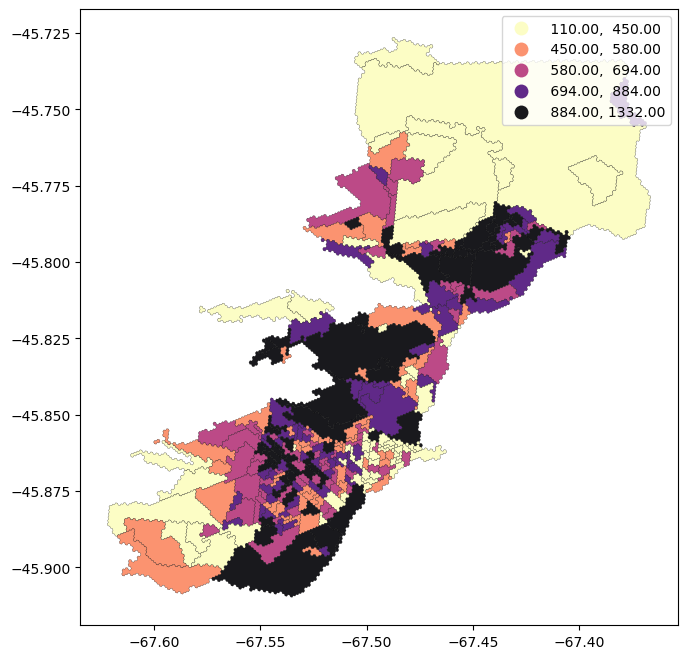

In [75]:
union.plot("pob2022",
            figsize = (8, 8),
            legend = True,
            scheme = "quantiles",
            cmap = "magma_r",
            alpha = 0.9,
            edgecolor = "black",
            linewidth = 0.2)

In [81]:
union.explore("pob2022",
               scheme = "quantiles",
               k = 10,
               cmap = "Spectral")